In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data Exploration

from sklearn.datasets import load_boston

boston_dataset = load_boston()
data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
data['MEDV'] = boston_dataset.target

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [6]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

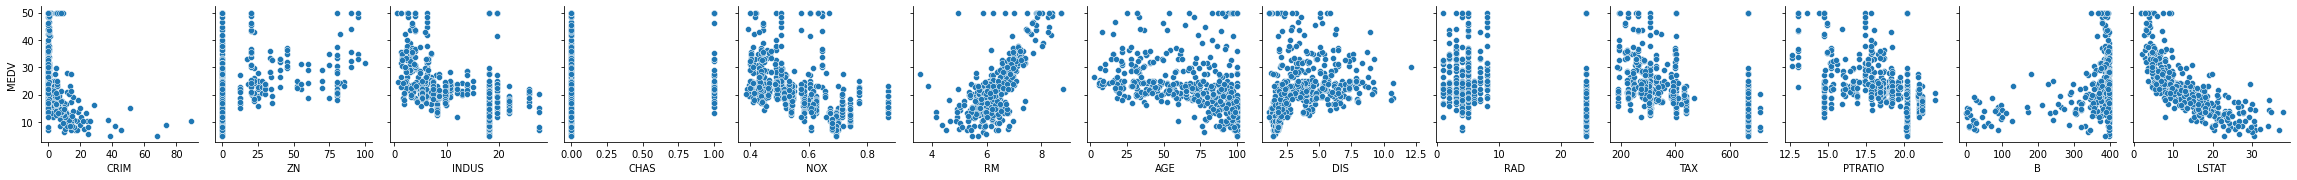

In [7]:
# Data visualisation 

sns.pairplot(data, x_vars=boston_dataset.feature_names, y_vars='MEDV')

Selection de caractéristiques

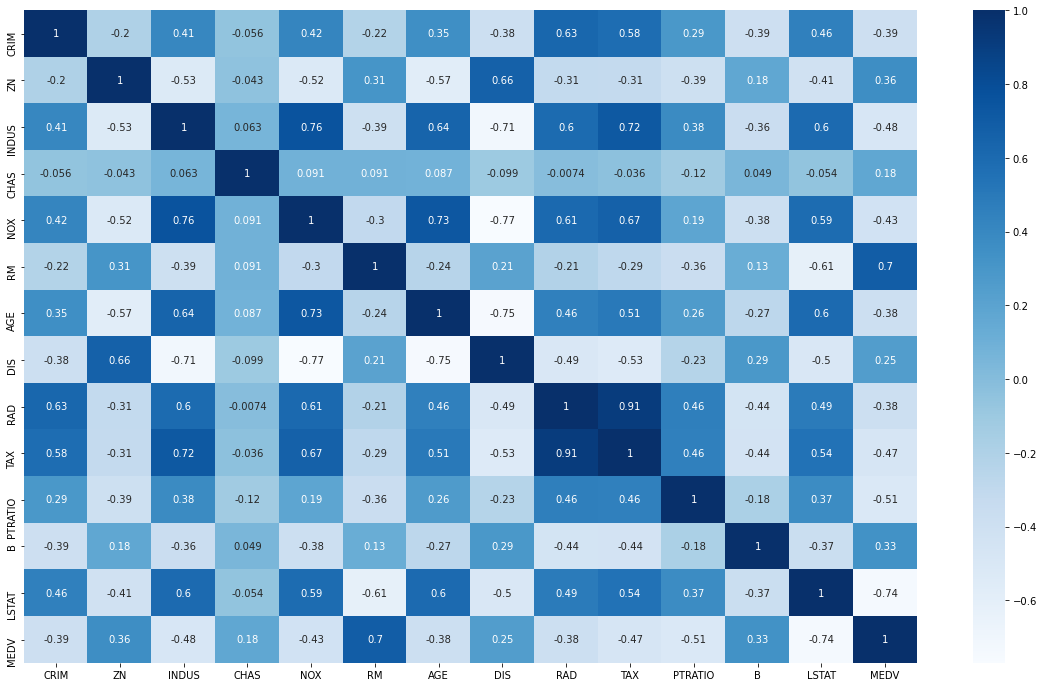

In [8]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot=True,cmap=plt.cm.Blues)
plt.show()

In [9]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
perfermonces_model = { }
def calcul_perfermonces(y,y_pred) :
    return {
        'MAE' : mean_absolute_error(y,y_pred) ,
        'MSE' : mean_squared_error(y,y_pred),
        'RMSE' :  mean_squared_error(y,y_pred,squared=False),
        'R-squared' : r2_score(y,y_pred) 
    }

Simple Linéaire Régression

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = data['LSTAT'].values.reshape(-1,1)
y = data['MEDV'].values.reshape(-1,1)

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [13]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [14]:
print(mean_squared_error(y_test,y_pred,squared=False))

6.358717085786453


In [15]:
perfermonces_model['Simple Linear Regression'] =  calcul_perfermonces(y_test,y_pred)

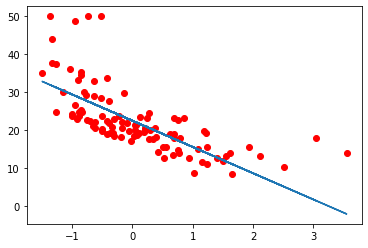

In [16]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,y_pred)

Quadratique linear regression

In [17]:
X = data[['RM','PTRATIO','LSTAT']].copy()
y = data['MEDV'].values.reshape(-1,1)

In [18]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X),columns=['RM','PTRATIO','LSTAT'])

<Figure size 432x288 with 0 Axes>

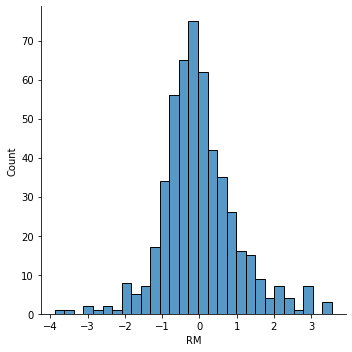

<Figure size 432x288 with 0 Axes>

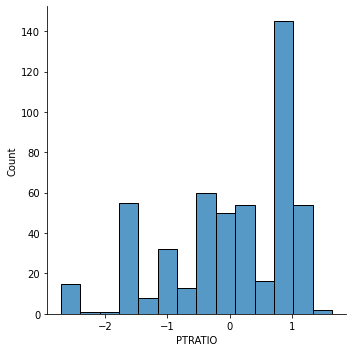

<Figure size 432x288 with 0 Axes>

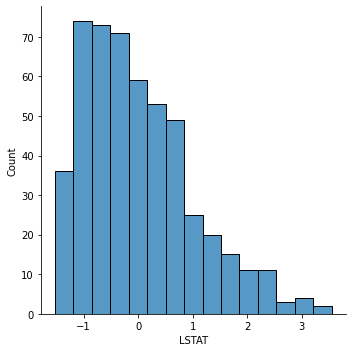

In [19]:
import seaborn as sns
for feature in ['RM','PTRATIO','LSTAT'] :
    plt.figure()
    sns.displot(X[feature])

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [21]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [22]:
print(mean_squared_error(y_test,y_pred,squared=False))

5.269817342633016


In [23]:
perfermonces_model['Quadratique Linear Regression'] =  calcul_perfermonces(y_test,y_pred)

Polynomiale Regression

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection  import GridSearchCV
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures()
pipe = make_pipeline(poly,LinearRegression())
params = {'polynomialfeatures__degree' : [x+1 for x in range(10)]}
grid = GridSearchCV(pipe,params,cv=3,scoring='neg_root_mean_squared_error').fit(X_train,y_train)
grid.best_params_

{'polynomialfeatures__degree': 2}

In [25]:
poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [27]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [28]:
print(mean_squared_error(y_test,y_pred,squared=False))

3.290842079598551


In [29]:
perfermonces_model['Polynomial Regression'] =  calcul_perfermonces(y_test,y_pred)

Lasso Regression

In [30]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1e-2)
params = {'alpha' : [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,1e-10]}
grid = GridSearchCV(lasso_model,params,cv=3,scoring='neg_root_mean_squared_error').fit(X_train,y_train)
grid.best_params_

{'alpha': 0.1}

In [40]:
lasso_model = Lasso(alpha=1e-1)
lasso_model.fit(X, y)
y_pred = lasso_model.predict(X_test)

In [41]:
print(mean_squared_error(y_test,y_pred,squared=False))

3.2401412989718748


In [42]:
perfermonces_model['Lasso Regression'] =  calcul_perfermonces(y_test,y_pred)

Ridge Regression

In [34]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1e-2)
params = {'alpha' : [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,1e-10]}
grid = GridSearchCV(ridge_model,params,cv=3,scoring='neg_root_mean_squared_error').fit(X_train,y_train)
grid.best_params_

{'alpha': 0.1}

In [35]:
ridge_model = Ridge(alpha=1e-1)
ridge_model.fit(X, y)
y_pred = ridge_model.predict(X_test)

In [36]:
print(mean_squared_error(y_test,y_pred,squared=False))

3.20226083745808


In [37]:
perfermonces_model['Ridge Regression'] =  calcul_perfermonces(y_test,y_pred)

Les perfermonces des différents modéles

In [43]:
df = pd.DataFrame(perfermonces_model)

In [44]:
df.T

,MAE,MSE,RMSE,R-squared
Simple Linear Regression,4.610089,40.433283,6.358717,0.464132
Quadratique Linear Regression,3.854716,27.770975,5.269817,0.682863
Polynomial Regression,2.543254,10.829642,3.290842,0.849425
Lasso Regression,2.493622,10.498516,3.240141,0.854029
Ridge Regression,2.475734,10.254474,3.202261,0.857422
